## LIBRARIES USED

In [86]:
#standard libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#sklearn
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#imblearn
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option("display.max_columns",100)

## DATA

In [3]:
# Files we have
os.listdir()

['Data_Dictionary.xlsx',
 'EXL_EQ_Case_Term_Deposit_Lead_Prediction_Final_Draft_PD_V01.pptx',
 'Historical_data.xlsx',
 'New_customer_list_data.xlsx',
 'Results',
 'WORKBOOK EXL.ipynb']

In [4]:
# reading files
data_dict = pd.read_excel("Data_Dictionary.xlsx")
historical_data = pd.read_excel("Historical_data.xlsx")
customer_list = pd.read_excel("New_customer_list_data.xlsx")

In [5]:
historical_data

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [6]:
customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [7]:
customer_list = customer_list.dropna()  # its better to predict outcomes for the ones we have more data , moreover not many NAN are there
customer_list.index = range(len(customer_list))
customer_list

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,id_6552,32.0,admin.,married,secondary,no,771.0,yes,yes,cellular,824,21,jul,1.0,0,unknown
7406,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown
7407,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure
7408,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown


In [8]:
data_dict

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


In [9]:
historical_data.describe().drop("day_of_month",axis=1)

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,1019.000000,63.000000,275.000000,1.000000


In [10]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

<AxesSubplot:xlabel='personal_loan', ylabel='balance'>

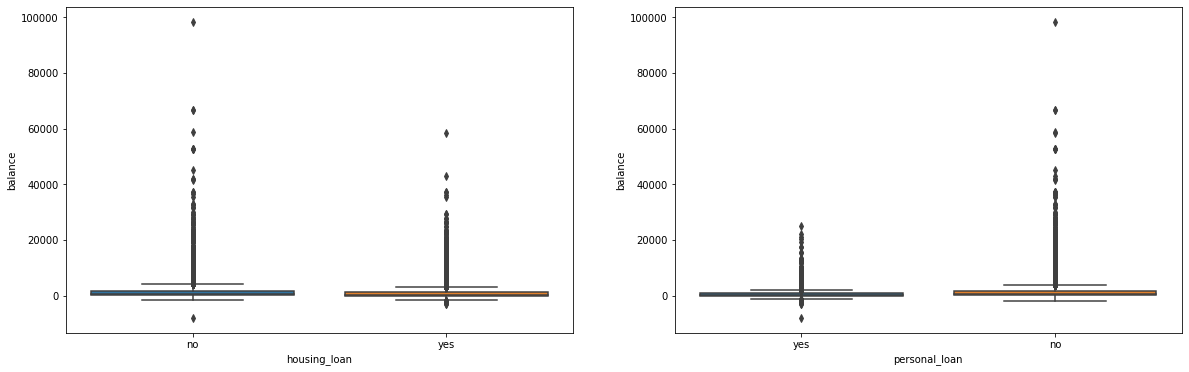

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y = historical_data["balance"],x= historical_data["housing_loan"],ax = ax[0])
sns.boxplot(y = historical_data["balance"],x= historical_data["personal_loan"], ax = ax[1])

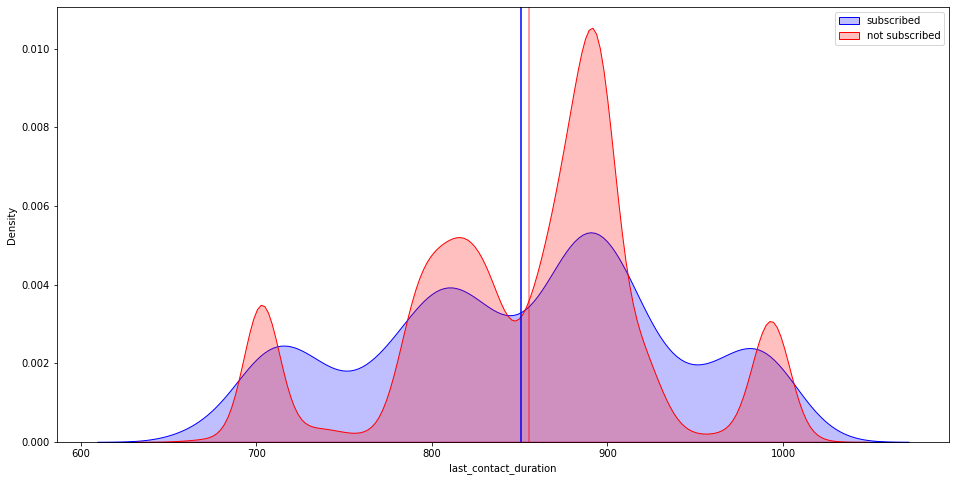

In [12]:
fig ,ax = plt.subplots(1,1 ,figsize=(16,8))
# sns.kdeplot(historical_data["last_contact_duration"] ,fill = True,ax = ax,color ="yellow",alpha = 0.1)
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == True]["last_contact_duration"] ,fill = True,ax = ax ,color = "b",label = "subscribed")
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == False]["last_contact_duration"] ,fill = True,ax = ax ,color = "r",label = "not subscribed")
# ax.axvline(historical_data["last_contact_duration"].mean())
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == True]["last_contact_duration"].mean(),color = "b")
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == False]["last_contact_duration"].mean(),color = "r",alpha =  0.5)
legend = ax.legend()

In [13]:
last_contact_avg = round(np.mean(historical_data["last_contact_duration"]))
above_avg = historical_data[historical_data["last_contact_duration"] > last_contact_avg]
below_avg = historical_data[historical_data["last_contact_duration"] <= last_contact_avg]
print( "people subscribing chance if last contact was made at most ",round(last_contact_avg),"(avg)  days before is ",round(below_avg["term_deposit_subscribed"].sum()*100/len(below_avg),2),"%" )
print( "people subscribing chance if last contact was made at least",round(last_contact_avg),"(avg)  days after is ",round(above_avg["term_deposit_subscribed"].sum()*100/len(above_avg),2),"%" )

people subscribing chance if last contact was made at most  855 (avg)  days before is  11.71 %
people subscribing chance if last contact was made at least 855 (avg)  days after is  9.79 %


<AxesSubplot:xlabel='education', ylabel='balance'>

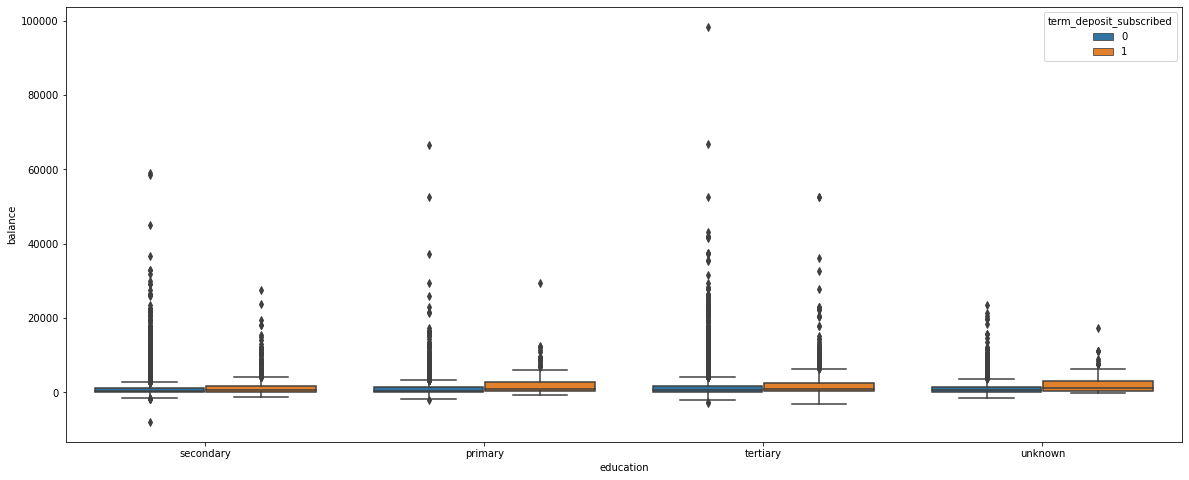

In [14]:
fig ,ax = plt.subplots(1,1,figsize=(20,8))
sns.boxplot(y = historical_data["balance"],x= historical_data["education"],hue = historical_data["term_deposit_subscribed"])

Customers subscribing are having higher balance (median) as compared to balance of same education level 

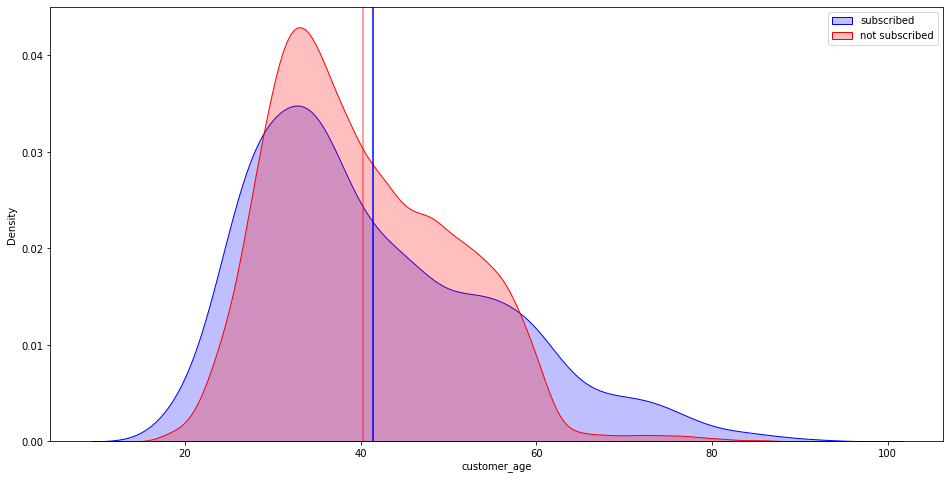

In [15]:
fig ,ax = plt.subplots(1,1 ,figsize=(16,8))
# sns.kdeplot(historical_data["customer_age"] ,fill = True,ax = ax,color ="yellow",alpha = 0.1)
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == True]["customer_age"] ,fill = True,ax = ax ,color = "b",label = "subscribed")
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == False]["customer_age"] ,fill = True,ax = ax ,color = "r",label = "not subscribed")
# ax.axvline(historical_data["customer_age"].mean())
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == True]["customer_age"].mean(),color = "b")
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == False]["customer_age"].mean(),color = "r",alpha =  0.5)
legend = ax.legend()

Target population is mostly young ( 28 to  38 years)

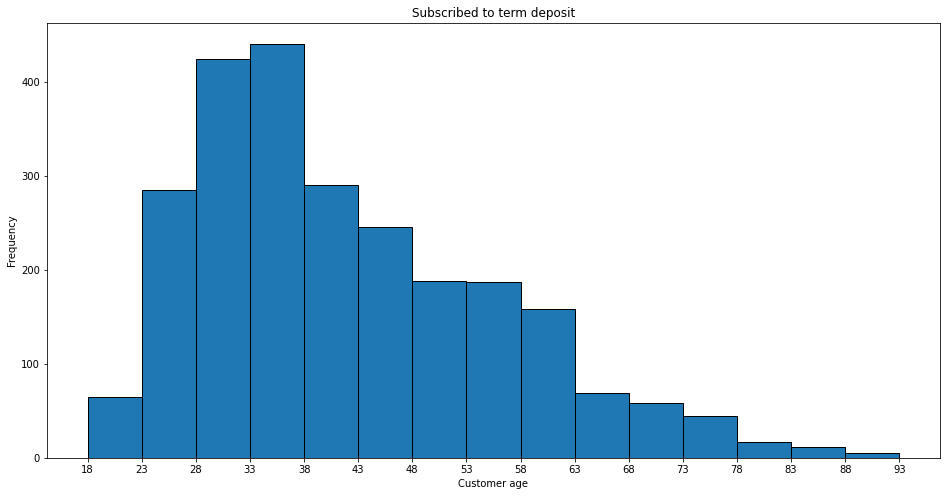

In [105]:
fig ,ax = plt.subplots(1,1 ,figsize=(16,8))
plt.hist(historical_data[historical_data["term_deposit_subscribed"] == True]["customer_age"],histtype='bar', ec='black',bins = 15)
plt.title("Subscribed to term deposit")
plt.ylabel("Frequency")
plt.xlabel("Customer age")
from pylab import xticks
x_val = xticks(range(18,94,5))


<AxesSubplot:xlabel='job_type', ylabel='balance'>

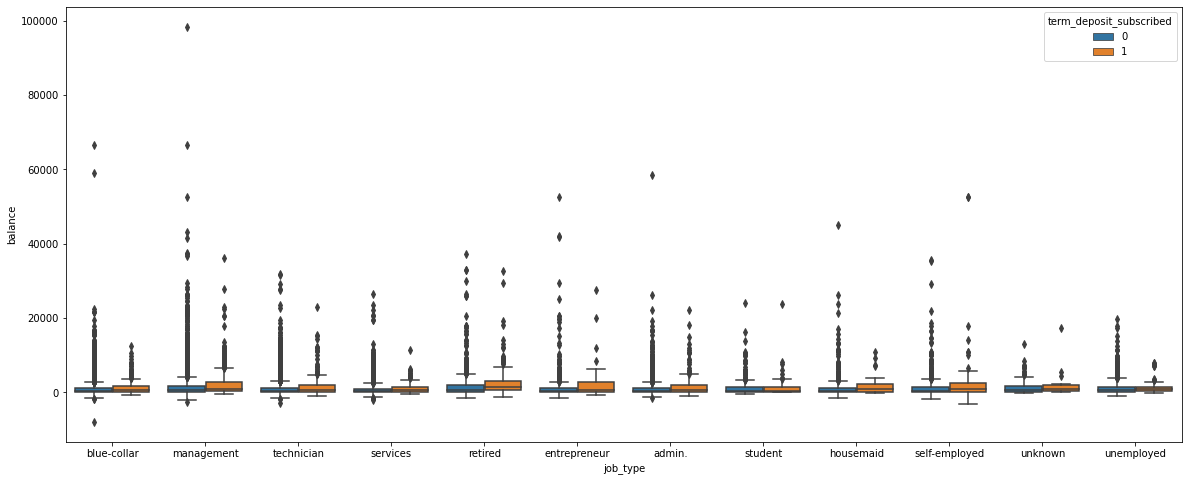

In [16]:
fig ,ax = plt.subplots(1,1,figsize=(20,8))
sns.boxplot(y = historical_data["balance"],x= historical_data["job_type"],hue = historical_data["term_deposit_subscribed"])

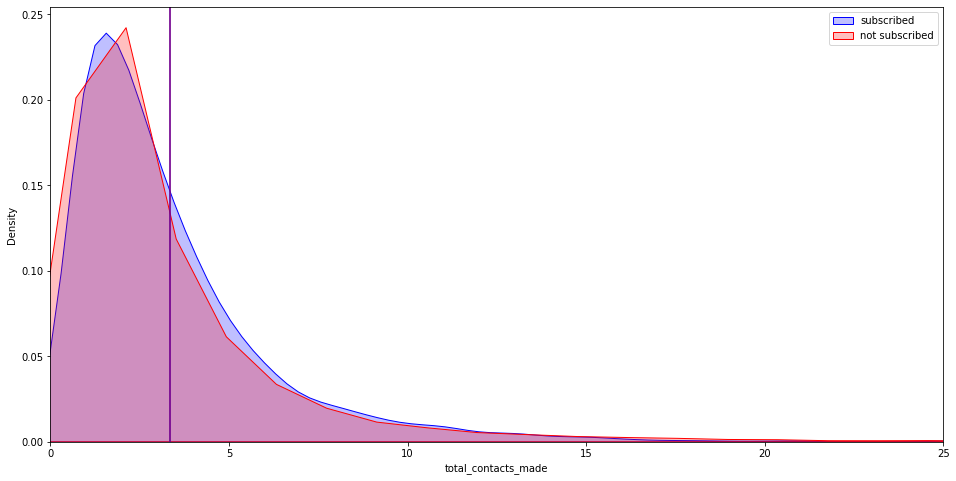

In [17]:
historical_data["total_contacts_made"] = historical_data["num_contacts_in_campaign"]+historical_data["num_contacts_prev_campaign"]
fig ,ax = plt.subplots(1,1 ,figsize=(16,8))
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == True]["total_contacts_made"] ,fill = True,ax = ax ,color = "b",label = "subscribed")
sns.kdeplot(historical_data[historical_data["term_deposit_subscribed"] == False]["total_contacts_made"] ,fill = True,ax = ax ,color = "r",label = "not subscribed")
# ax.axvline(historical_data["total_contacts_made"].mean())
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == True]["total_contacts_made"].mean(),color = "b")
ax.axvline(historical_data[historical_data["term_deposit_subscribed"] == False]["total_contacts_made"].mean(),color = "r",alpha =  0.5)
ax.set_xlim(0,25)
legend = ax.legend()

In [18]:
df = historical_data.dropna()

## Data labelling

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22829 entries, 0 to 23879
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 22829 non-null  object 
 1   customer_age                22829 non-null  float64
 2   job_type                    22829 non-null  object 
 3   marital                     22829 non-null  object 
 4   education                   22829 non-null  object 
 5   default                     22829 non-null  object 
 6   balance                     22829 non-null  float64
 7   housing_loan                22829 non-null  object 
 8   personal_loan               22829 non-null  object 
 9   communication_type          22829 non-null  object 
 10  day_of_month                22829 non-null  int64  
 11  month                       22829 non-null  object 
 12  last_contact_duration       22829 non-null  int64  
 13  num_contacts_in_campaign    228

In [20]:
df.drop(['prev_campaign_outcome',"total_contacts_made"],axis = 1,inplace = True)


C:\Users\ADITYA\anaconda3\envs\gpu2\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,1
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,0
5,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,807,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,0


In [22]:
df.index = range(len(df))
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,1
3,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,0
4,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,807,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22824,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,0
22825,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,0
22826,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,0
22827,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,0


One hot encoding

In [23]:
# cateogorical columns 
#    "job_type","martial","education","default","housing_loan","personal_loan","communicationn_type"
to_be_one_hot = ["default","housing_loan","personal_loan","education","marital","job_type","communication_type"]
all_data = df[to_be_one_hot].append(customer_list[to_be_one_hot])

In [24]:
enc = OneHotEncoder(sparse = False)
x = pd.DataFrame(enc.fit_transform(all_data[to_be_one_hot]) ,columns = enc.get_feature_names(to_be_one_hot))


In [25]:

historical_cat = x.iloc[:22829]
new_data_cat = x.iloc[22829:]
new_data_cat.index = range(len(new_data_cat))

In [26]:
other_col = ["customer_id","customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]
# pd.concat([df[other_col],historical_cat],axis=0)
train_data = pd.concat([df[other_col],historical_cat],axis=1)
train_data["term_deposit_subscribed"] = df.term_deposit_subscribed
customer_list = pd.concat([customer_list[other_col],new_data_cat],axis=1)

Scaling the numerical data

In [27]:

st = StandardScaler()
trained_st = st.fit(train_data[["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]])
customer_list[["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]] =pd.DataFrame(trained_st.transform(customer_list[["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]]) ,columns = ["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"])
train_data[["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]]  =pd.DataFrame(trained_st.transform(train_data[["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"]]) ,columns = ["customer_age","balance","last_contact_duration","num_contacts_in_campaign","num_contacts_prev_campaign"])


In [28]:
train_data

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,term_deposit_subscribed
0,id_32289,-0.594747,-0.142356,-2.020768,-0.245955,0.155665,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,id_40992,0.056951,-0.004663,0.511826,-0.245955,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,id_41178,1.546546,-0.286967,-0.787971,0.394286,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,id_34750,-1.060245,-0.362732,-0.801371,-0.245955,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,id_1406,0.894848,-0.315955,-0.640571,-0.245955,-0.220425,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22824,id_27290,1.639646,-0.263250,1.851823,-0.245955,0.907845,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
22825,id_20428,0.987948,-0.096898,0.002627,1.354647,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
22826,id_44679,0.056951,-0.370308,0.377826,-0.245955,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
22827,id_4841,0.708649,0.439053,-0.694171,1.034527,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [29]:
customer_list

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown
0,id_43823,-1.153345,-0.356143,-0.077773,0.394286,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,id_10523,0.522450,-0.233932,1.811623,0.394286,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,id_43951,-0.594747,-0.449366,0.418026,0.074165,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,id_12681,2.291344,0.498676,0.779825,-0.566076,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,id_2153,1.081048,0.135995,-2.034168,0.074165,0.155665,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,id_6552,-0.780946,-0.196050,-0.412772,-0.566076,-0.220425,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7406,id_29917,1.081048,0.131054,0.109827,-0.245955,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,id_9275,0.894848,-0.317932,-0.158172,-0.566076,2.036114,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7408,id_16678,1.453446,-0.375249,-2.007368,-0.566076,-0.220425,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
print("people% subscribed in data" , round(sum(train_data["term_deposit_subscribed"])*100/len(train_data["term_deposit_subscribed"]),2),"%")
print("people% not subscribed in data" , 100 -round(sum(train_data["term_deposit_subscribed"])*100/len(train_data["term_deposit_subscribed"]),2),"%")

people% subscribed in data 10.67 %
people% not subscribed in data 89.33 %


#### Highly Imbalanced data with 10 % positive outcome
##### two things can be done 
#####    1) undersampling
#####    2) oversampling

## UNDERSAMPLING


 A 50-50 ratio of positive and negative outcomes is taken

In [31]:
print("people subscribed in data :",sum(train_data["term_deposit_subscribed"]))

people subscribed in data : 2436


In [32]:
random_state =  0        # so that data can be regenerated

In [33]:
train_data = train_data.sample(frac=1,random_state=random_state) # shuffling of data

In [34]:
non_subs = train_data[train_data["term_deposit_subscribed"]== 0].iloc[:2436]
subs = train_data[train_data["term_deposit_subscribed"]== 1]
undersampled_train_data = pd.concat([subs,non_subs])
undersampled_train_data = undersampled_train_data.sample(frac = 1 ,random_state = random_state)

In [35]:
print("subscribed :",sum(undersampled_train_data["term_deposit_subscribed"]))
print("not subscribed:",len(undersampled_train_data)-sum(undersampled_train_data["term_deposit_subscribed"]))

subscribed : 2436
not subscribed: 2436


#### Correlation matrix

In [36]:
undersampled_train_data

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,term_deposit_subscribed
16137,id_12170,-0.315448,-0.364049,0.686026,-0.566076,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9691,id_22681,-0.036149,-0.456943,0.873625,-0.566076,1.283934,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
17032,id_22888,-1.153345,-0.396002,0.418026,-0.245955,-0.220425,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1267,id_17279,0.336250,-0.434214,-0.627171,-0.245955,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3953,id_173,-0.687846,-0.329461,-0.962170,-0.566076,0.155665,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12712,id_9582,0.987948,-0.387767,0.029427,0.074165,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
13396,id_18219,0.150051,-0.443108,-0.466372,-0.245955,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
13044,id_37243,0.429350,-0.340002,-0.104572,0.074165,3.164384,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
17234,id_22340,-0.408547,-0.301461,0.337626,0.714406,-0.220425,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


<AxesSubplot:>

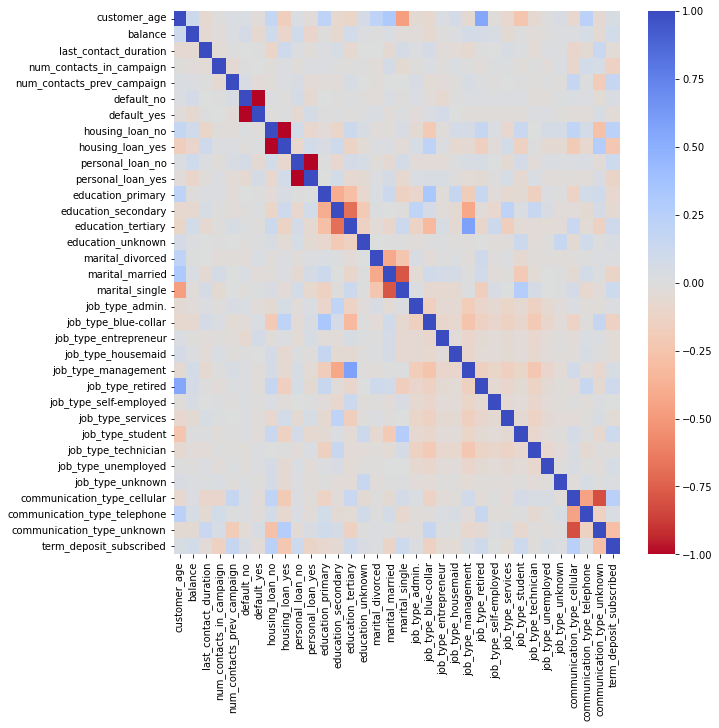

In [37]:
fig , ax = plt.subplots(1,1,figsize=(10,10))

corr = undersampled_train_data.corr()
sns.heatmap(corr , cmap = "coolwarm_r",ax= ax)

Clearly the features having only 2 outputs (yes/no) are correlated , so they need to be removed

In [38]:
undersampled_train_data.drop(['default_yes','housing_loan_yes','personal_loan_yes'],axis=1,inplace = True)

<AxesSubplot:>

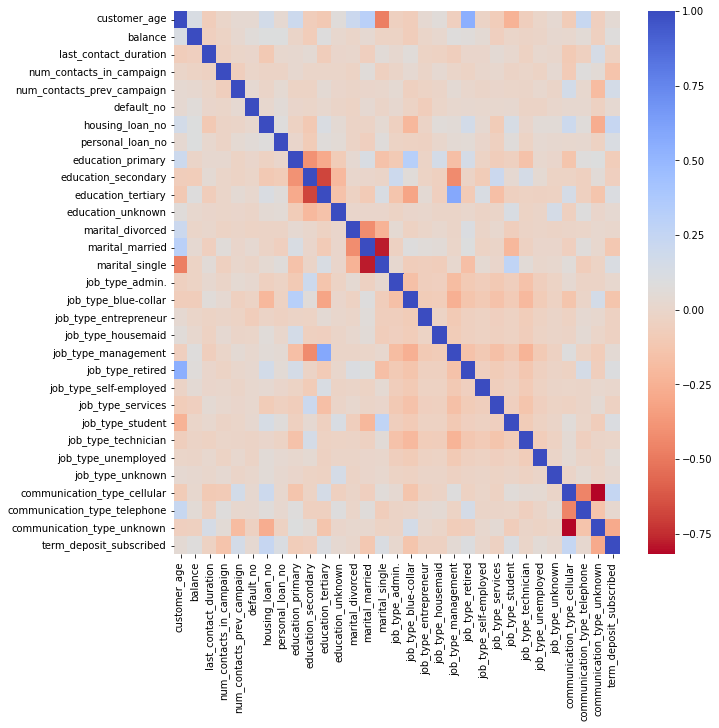

In [39]:
fig , ax = plt.subplots(1,1,figsize=(10,10))

corr = undersampled_train_data.corr()
sns.heatmap(corr , cmap = "coolwarm_r",ax= ax)

In [40]:
# train ,test split
X_train , X_test , y_train , y_test = train_test_split(undersampled_train_data.drop(["term_deposit_subscribed","customer_id"],axis=1)
                                                       ,undersampled_train_data["term_deposit_subscribed"],test_size=0.2 ,random_state = random_state)

In [41]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier_linear": SVC(kernel = "linear"),
    "Support Vector Classifier": SVC(kernel = "rbf",C = 1, probability = True),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [42]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
# average of cross val score of
# Logistic : 67 %
# KNN : 67 %
# SVC(linear) : 67 %
# SVC(rbf) : 67 %
# Dtree : 64 %

Classifiers:  LogisticRegression Has a training score of 67.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 66.0 % accuracy score
Classifiers:  SVC Has a training score of 67.0 % accuracy score
Classifiers:  SVC Has a training score of 69.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 64.0 % accuracy score


Best model seems to be rbf but feature importance calculation from svc(rbf kernel) is not possible ,so the (common)features of top importances from different models can be assumed to be of top importances 

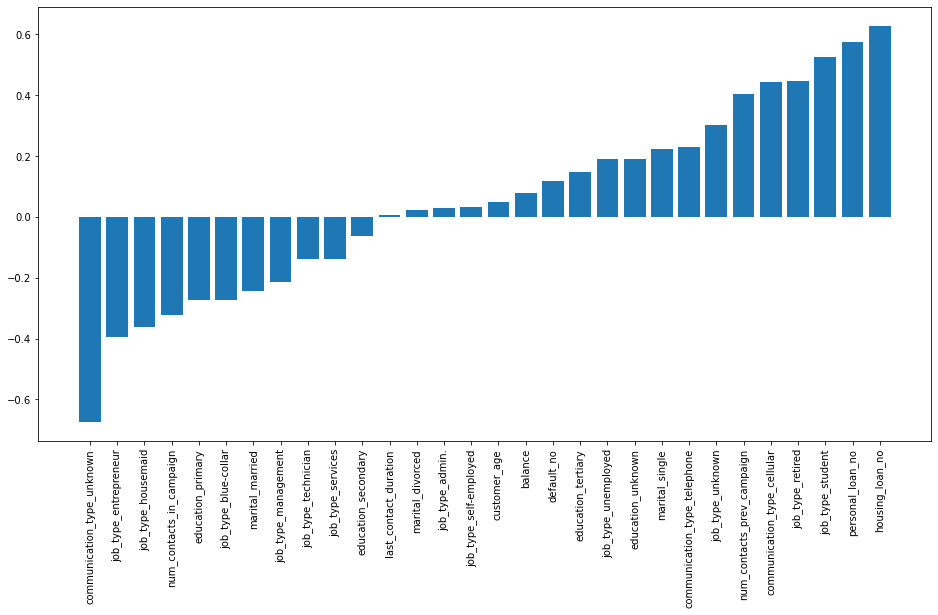

In [130]:
fig ,ax = plt.subplots(1,1 ,figsize = (16,8))
imp_lr = classifiers["LogisiticRegression"].coef_[0]
columns = X_train.columns
imp_lr =[ [ imp_lr[i] , columns[i] ] for i in range(30) ]
imp_lr.sort()
plt.bar([imp_lr[i][1] for i in range(30)] ,[imp_lr[i][0] for i in range(30)])
xticks = plt.xticks(rotation = 90)

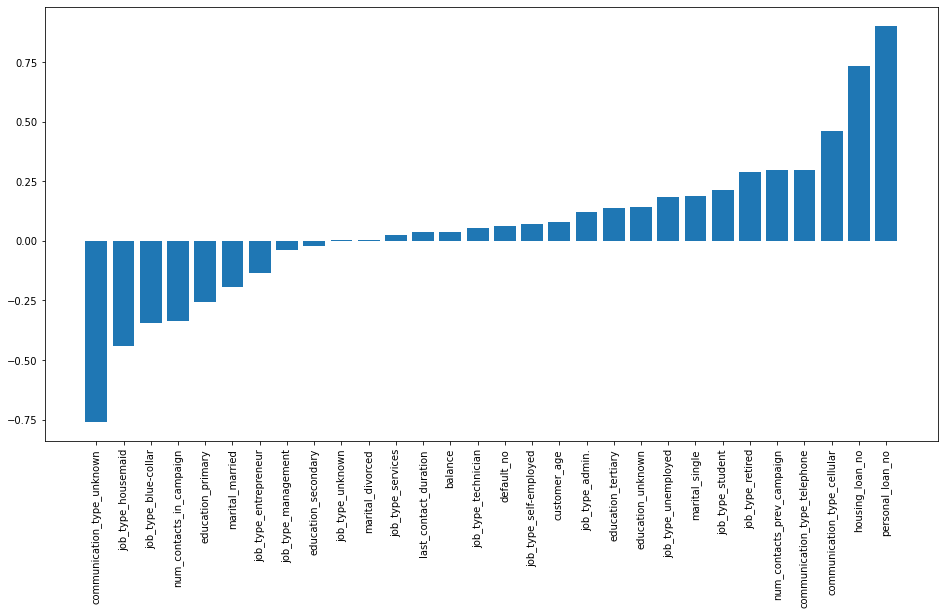

In [120]:
fig ,ax = plt.subplots(1,1 ,figsize = (16,8))
imp_lr = classifiers["Support Vector Classifier_linear"].coef_[0]
columns = X_train.columns
imp_lr =[ [ imp_lr[i] , columns[i] ] for i in range(30) ]
imp_lr.sort()
plt.bar([imp_lr[i][1] for i in range(30)] ,[imp_lr[i][0] for i in range(30)])
xticks = plt.xticks(rotation = 90)

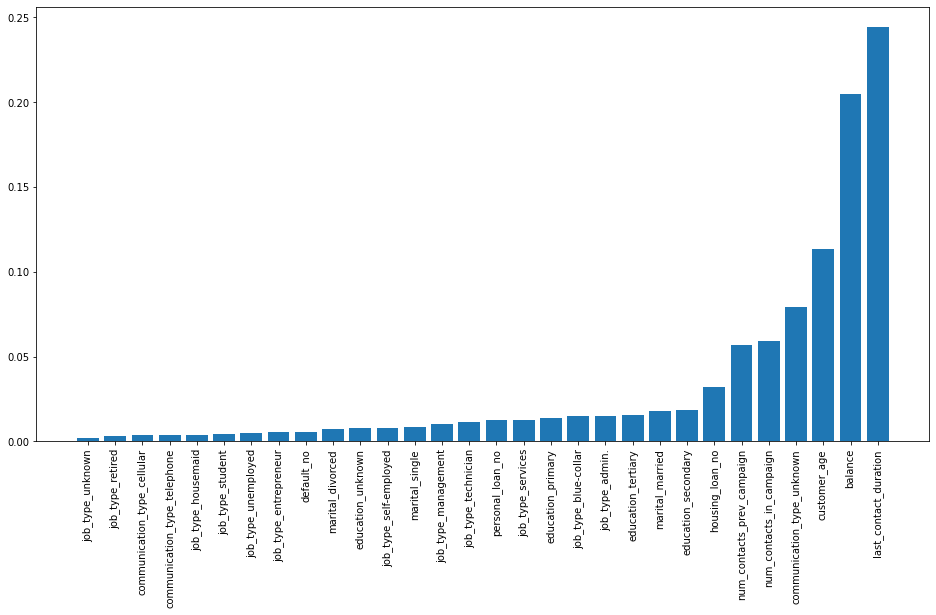

In [115]:
fig ,ax = plt.subplots(1,1 ,figsize = (16,8))
imp_lr = classifiers["DecisionTreeClassifier"].feature_importances_
columns = X_train.columns
imp_lr =[ [ imp_lr[i] , columns[i] ] for i in range(30) ]
imp_lr.sort()
plt.bar([imp_lr[i][1] for i in range(30)] ,[imp_lr[i][0] for i in range(30)])
xticks = plt.xticks(rotation = 90)

Features of top importance includes : Housing loan, Personal loan ,communication type , number of contacts  

In [148]:
model = classifiers["Support Vector Classifier"]

In [149]:
print( "Train accuracy :",accuracy_score(y_train,model.predict(X_train)) )      # 73 %
print( "Test accuracy :",accuracy_score(y_test,model.predict(X_test)) )         # 71 %

Train accuracy : 0.7305619707467282
Test accuracy : 0.7097435897435898


In [150]:
confusion_matrix(y_test,model.predict(X_test))         # tn, fp, fn, tp = 354 ,152 ,131 ,338

array([[354, 131],
       [152, 338]], dtype=int64)

In [176]:
print(classification_report(y_test ,model.predict(X_test) ))          # f1 score : 0.71

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       485
           1       0.72      0.69      0.70       490

    accuracy                           0.71       975
   macro avg       0.71      0.71      0.71       975
weighted avg       0.71      0.71      0.71       975



In [155]:
new_y_t = y_test
new_y_t.index = range(len(new_y_t))

In [160]:
 test_predictions = pd.DataFrame(model.predict_proba(X_test))
 test_predictions["actual"] = new_y_t
 test_predictions.sort_values(by=[0])
 

,0,1,actual
667,0.076621,0.923379,1
168,0.099469,0.900531,1
105,0.110848,0.889152,1
641,0.111166,0.888834,1
488,0.114559,0.885441,1
...,...,...,...
810,0.824252,0.175748,0
971,0.826513,0.173487,1
330,0.835292,0.164708,0
676,0.847389,0.152611,0


In [161]:
prediction = pd.DataFrame(model.predict_proba(customer_list.drop(["customer_id",'default_yes','housing_loan_yes','personal_loan_yes'],axis=1)))
prediction["customer_id"] = customer_list["customer_id"]


In [163]:
prediction.sort_values(by=[0])

,0,1,customer_id
4732,0.081200,0.918800,id_9631
5438,0.089681,0.910319,id_5797
4684,0.098157,0.901843,id_3482
2693,0.099573,0.900427,id_38872
2279,0.100869,0.899131,id_13597
...,...,...,...
7333,0.868825,0.131175,id_29342
1580,0.870469,0.129531,id_26052
2541,0.872129,0.127871,id_42551
3811,0.872581,0.127419,id_2783


This is actually the best model which we get to know aftr whole analysis 

In [ ]:
prediction.sort_values(by=[0])["customer_id"].to_csv("Results/Final_result.csv")  # Submitted result

## OVERSAMPLING

In [166]:
sm = SMOTE(random_state = random_state )

In [170]:
train_data = train_data.drop(['default_yes','housing_loan_yes','personal_loan_yes'],axis=1)

In [171]:
train_unsubs = train_data[train_data["term_deposit_subscribed"]== 0]
train_subs = train_data[train_data["term_deposit_subscribed"]== 1]

In [173]:
train_unsubs

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,housing_loan_no,personal_loan_no,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,term_deposit_subscribed
3588,id_15916,0.429350,-0.433884,0.511826,-0.566076,-0.220425,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16123,id_37353,0.429350,-0.380190,0.605626,-0.245955,-0.220425,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1086,id_19733,1.639646,-0.480990,-0.332372,0.714406,-0.220425,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
10997,id_21207,1.174147,-0.612754,-0.921970,2.315009,-0.220425,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
19659,id_17059,0.987948,-0.403578,0.217027,2.315009,-0.220425,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,id_2719,1.546546,-0.173980,0.592226,-0.566076,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
19648,id_23374,1.174147,-0.449037,-0.533371,0.074165,-0.220425,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9845,id_1481,-0.036149,-0.203626,-0.962170,0.074165,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
10799,id_30555,-0.222348,-0.541931,-0.225172,-0.566076,-0.220425,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [177]:
# Making Test data for model ( 1000 rows )
# As running test on non actual values wont be good
test_data_subs = train_subs.iloc[:500]
test_data_unsubs = train_unsubs.iloc[:500]
test_data= pd.concat([test_data_subs,test_data_unsubs])
test_data

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,housing_loan_no,personal_loan_no,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,term_deposit_subscribed
1180,id_30352,1.360347,0.288842,0.243827,-0.245955,0.155665,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
11483,id_17598,-1.246445,-0.606495,-0.828171,-0.245955,-0.220425,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
22436,id_43970,2.012045,-0.361414,0.820025,-0.566076,-0.220425,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
11021,id_33448,-0.315448,-0.248426,1.838423,-0.566076,-0.220425,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
22104,id_29878,-1.246445,1.114014,-1.940368,0.394286,0.155665,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,id_3707,2.943041,-0.272473,0.699426,0.714406,-0.220425,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2069,id_3742,-0.222348,-0.553789,0.002627,0.074165,-0.220425,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
21116,id_12760,0.894848,-0.357461,0.538626,-0.566076,0.907845,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5741,id_33919,-0.129248,-0.578166,-0.251972,-0.245955,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [178]:
# training data for oversampling
train_data_subs = train_subs.iloc[500:]
train_data_unsubs = train_unsubs.iloc[500:]
train_data_over= pd.concat([train_data_subs,train_data_unsubs])
train_data_over

,customer_id,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,default_no,housing_loan_no,personal_loan_no,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,term_deposit_subscribed
10422,id_1090,1.918945,-0.262920,-0.586971,-0.245955,2.036114,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8053,id_23013,1.825845,-0.262261,-0.600371,-0.566076,2.788294,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6052,id_18745,0.708649,-0.011251,-0.171572,-0.245955,-0.220425,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
11360,id_111,-0.315448,-0.361085,-0.707571,-0.566076,-0.220425,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
7480,id_40861,-0.129248,-0.060662,-0.533371,-0.245955,-0.220425,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,id_2719,1.546546,-0.173980,0.592226,-0.566076,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
19648,id_23374,1.174147,-0.449037,-0.533371,0.074165,-0.220425,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9845,id_1481,-0.036149,-0.203626,-0.962170,0.074165,-0.220425,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
10799,id_30555,-0.222348,-0.541931,-0.225172,-0.566076,-0.220425,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [179]:
X_train = train_data_over.drop(["customer_id","term_deposit_subscribed"],axis=1)
y_train = train_data_over["term_deposit_subscribed"]

In [180]:
X_test = test_data.drop(["customer_id","term_deposit_subscribed"],axis=1)
y_test = test_data["term_deposit_subscribed"]

In [181]:
# Oversampling
X_res, y_res = sm.fit_resample(X_train, y_train)

In [191]:
print(" Size of training data is" , X_res.shape)
print("Value counts of term deposit subsribed\n",y_res.value_counts())

 Size of training data is (39786, 30)
Value counts of term deposit subsribed
 1    19893
0    19893
Name: term_deposit_subscribed, dtype: int64


In [193]:
classifiers = {
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Rf": RandomForestClassifier()
}

In [194]:
for key, classifier in classifiers.items():
    classifier.fit(X_res, y_res)
    print("Classifiers: ", classifier.__class__.__name__, "Has a test accuracy of", accuracy_score(y_test , classifier.predict(X_test))*100, "% accuracy score")

# SVC : 66 %
# Decision tree : 60 %
# Random forest : 60 %

Classifiers:  SVC Has a training score of 0.662 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 0.601 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 0.604 % accuracy score


In [195]:
model_over = classifiers["Support Vector Classifier"]

In [198]:
print( "Train accuracy :",accuracy_score(y_res,model_over.predict(X_res)) )     # 81 %
print( "Test accuracy :",accuracy_score(y_test,model_over.predict(X_test)) )    # 66 %    ( Overfitting )

Train accuracy : 0.8113658070678128
Test accuracy : 0.662


In [196]:
confusion_matrix(y_test ,model.predict(X_test))   #tn , fp , fn , tp = 378 ,160 ,122 ,340


array([[378, 122],
       [160, 340]], dtype=int64)

In [201]:
print(classification_report(y_test , model_over.predict(X_test)))     # Over sampled svm model

              precision    recall  f1-score   support

           0       0.63      0.80      0.70       500
           1       0.72      0.52      0.61       500

    accuracy                           0.66      1000
   macro avg       0.68      0.66      0.66      1000
weighted avg       0.68      0.66      0.66      1000



In [203]:
print(classification_report(y_test , model.predict(X_test)))     # under sampled svm model

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       500
           1       0.74      0.68      0.71       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



### DNN

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [208]:
model_dnn = Sequential()

In [209]:
# Simple deep neural network
model_dnn.add(Dense(units = 30 , activation = "relu",input_shape = (30,)) )
model_dnn.add(Dense(units = 16 , activation = "relu") )
model_dnn.add(Dense(units = 8 , activation = "relu") )
model_dnn.add(Dense(units =1 , activation = "sigmoid") )


In [210]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [211]:
model_dnn.compile(loss="binary_crossentropy",metrics = ["accuracy"])

In [212]:
model_dnn.fit(X_res,y_res,validation_split=0.2,epochs = 40,verbose = 2)

Epoch 1/40
995/995 - 7s - loss: 0.5644 - accuracy: 0.7180 - val_loss: 0.8741 - val_accuracy: 0.5123
Epoch 2/40
995/995 - 4s - loss: 0.5278 - accuracy: 0.7496 - val_loss: 0.8033 - val_accuracy: 0.5553
Epoch 3/40
995/995 - 3s - loss: 0.5145 - accuracy: 0.7573 - val_loss: 0.7715 - val_accuracy: 0.5694
Epoch 4/40
995/995 - 3s - loss: 0.5031 - accuracy: 0.7633 - val_loss: 0.7516 - val_accuracy: 0.5767
Epoch 5/40
995/995 - 3s - loss: 0.4939 - accuracy: 0.7691 - val_loss: 0.6606 - val_accuracy: 0.6250
Epoch 6/40
995/995 - 3s - loss: 0.4855 - accuracy: 0.7724 - val_loss: 0.5956 - val_accuracy: 0.6842
Epoch 7/40
995/995 - 3s - loss: 0.4777 - accuracy: 0.7771 - val_loss: 0.6322 - val_accuracy: 0.6386
Epoch 8/40
995/995 - 3s - loss: 0.4702 - accuracy: 0.7799 - val_loss: 0.5912 - val_accuracy: 0.6906
Epoch 9/40
995/995 - 3s - loss: 0.4638 - accuracy: 0.7844 - val_loss: 0.6393 - val_accuracy: 0.6331
Epoch 10/40
995/995 - 3s - loss: 0.4568 - accuracy: 0.7880 - val_loss: 0.5157 - val_accuracy: 0.7492

In [225]:
pred_0 = model_dnn.predict(X_test)
pred = [ 0 if val < 0.5 else 1 for val in pred_0]      # Convrting probabilities to classification


In [226]:
accuracy_score(y_test ,pred )                # 65 %

0.646

In [227]:
print(classification_report(y_test , pred))            # f1 score : 0.62 ,accuracy : 0.65

              precision    recall  f1-score   support

           0       0.60      0.89      0.71       500
           1       0.78      0.41      0.53       500

    accuracy                           0.65      1000
   macro avg       0.69      0.65      0.62      1000
weighted avg       0.69      0.65      0.62      1000



## RESULT

SVC underfitting with 72% accuracy on test data is best bet